In [1]:
import numpy
from matplotlib import pyplot

In [2]:
def ei(x):
    return numpy.exp(1.0j*x)
pi = numpy.pi

# These are the bloch vectors
eigx1 = numpy.asarray([-ei(3*pi/4), 1.0j, ei(pi/4), 1])
eigx1 = eigx1 / numpy.linalg.norm(eigx1)
eigx2 = numpy.conj(eigx1)

In [348]:
# This is what the bloch vectors look like in the z basis.
x_to_z = numpy.asarray([
   [1, 1, 1, 1],
   [1, 1, 1, -1],
   [1, 1, -1, 1],
   [1, 1, -1, -1],
   [1, -1, 1, 1],
   [1, -1, 1, -1],
   [1, -1, -1, 1],
   [1, -1, -1, -1],
   [-1, 1, 1, 1],
   [-1, 1, 1, -1],
   [-1, 1, -1, 1],
   [-1, 1, -1, -1],
   [-1, -1, 1, 1],
   [-1, -1, 1, -1],
   [-1, -1, -1, 1],
   [-1, -1, -1, -1]
])

eigz1 = x_to_z @ eigx1
eigz1 = eigz1 / numpy.linalg.norm(eigz1)
eigz2 = x_to_z @ eigx2
eigz2 = eigz2 / numpy.linalg.norm(eigz2)

Using GL:

$\vec{k}_\pm = \pm (\frac{\pi}{2}, -\frac{\pi}{2})$

$\phi^{(\pm)} = e^{\pm i \theta} \vert \phi \vert$

$f = r \vert \phi \vert^2 + u \vert \phi \vert^4 + g \mbox{cos}(4 \theta) \vert \phi \vert^4$

$\vec{\psi}_a(\vec{r}) = \sum_\mu e^{i \vec{k}_\mu \cdot \vec{r}} \phi^{(\mu)} \vec{\chi}^{(\mu)}_a$

In [364]:
# z_to_dimer = numpy.asarray([
#    [1, 0, 0, 0],
#    [1, 0, 1, 1],
#    [1, 1, 1, 0],
#    [1, 1, 0, 1],
#    [0, 1, 0, 0],
#    [0, 1, 1, 1],
#    [0, 0, 1, 0],
#    [0, 0, 0, 1],
#    [0, 0, 0, 1],
#    [0, 0, 1, 0],
#    [0, 1, 1, 1],
#    [0, 1, 0, 0],
#    [1, 1, 0, 1],
#    [1, 1, 1, 0],
#    [1, 0, 1, 1],
#    [1, 0, 0, 0]
# ]).T

def draw_for_func(f, xsidelen=8, ysidelen=8):
    wf_dirs = [
        (0.5, 0.5),
        (0.5, -0.5),
        (-0.5, -0.5),
        (-0.5, 0.5)
    ]
    for x in range(xsidelen):
        for y in range(ysidelen):
            wf = f(x, y)
            for p, (dx, dy) in zip(wf, wf_dirs):
                pyplot.plot([x, x+dx], [y, y+dy], c='r', alpha=p)
    pyplot.grid()
    pyplot.show()

def dimer_probs_for_pos_theta(x, y, theta, phi_abs=1.0):
#     zbasis = ei(pi/2 * (x - y))*eigz1 + ei(theta)*ei(-pi/2 * (x - y))*eigz2
#     zbasis_probs = zbasis.real**2 + zbasis.imag**2
#     dimer_probs = z_to_dimer @ zbasis_probs
#     dimer_probs = dimer_probs / numpy.linalg.norm(dimer_probs)
#     return dimer_probs

    z_expected = phi_abs*(ei(-theta/2)*ei(pi/2 * (x - y))*eigx1 + ei(theta/2)*ei(-pi/2 * (x - y))*eigx2)
    # Dimers from j<sz><sz>
    dimer_expected = -z_expected * numpy.roll(z_expected, -1, axis=0) * [-1, 1, 1, 1]
    return (1+dimer_expected)/2.0
    
def draw_for_theta(theta):
    def dimer_probs_for_pos(x,y):
        return dimer_probs_for_pos_theta(x, y, theta)
    draw_for_func(dimer_probs_for_pos)
    

$g < 0$ prefers $90^\circ$ angles

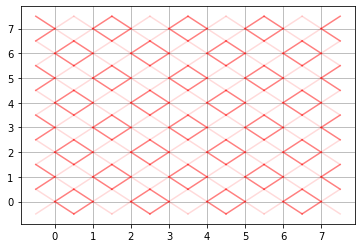

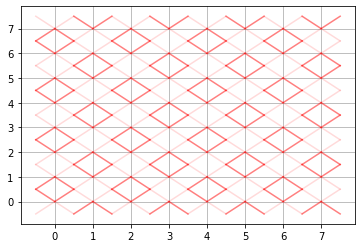

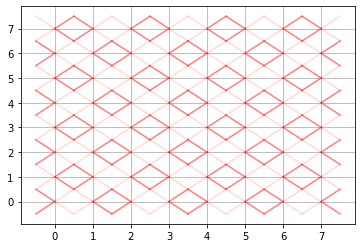

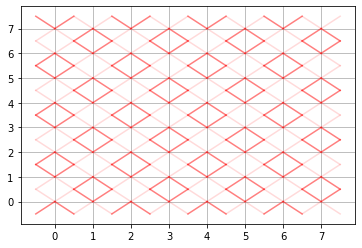

In [366]:
draw_for_theta(0.)
draw_for_theta(pi/2)
draw_for_theta(pi)
draw_for_theta(3*pi/2)

$g > 0$ prefers $45^\circ$ angles

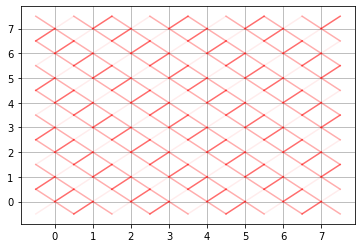

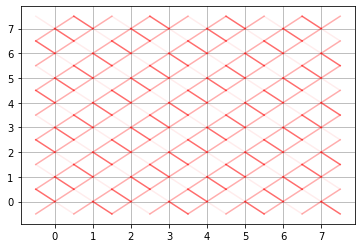

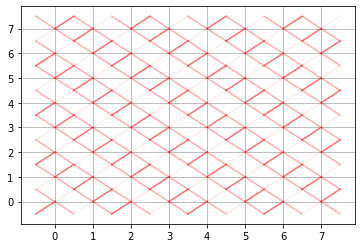

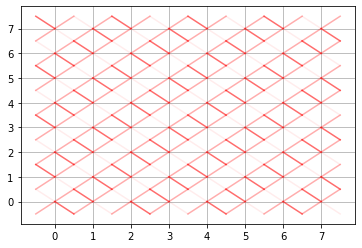

In [367]:
draw_for_theta(pi/4)
draw_for_theta(pi/2 + pi/4)
draw_for_theta(pi + pi/4)
draw_for_theta(3*pi/2 + pi/4)

Some order params:

try giving each dimer direction a complex number: $e^{i \pi \theta}$ with $\theta \in \{0^\circ, 90^\circ, 180^\circ, 240^\circ\}$

In [288]:
def fft2(data):
    fft_data = numpy.fft.fft2(data, norm='ortho')
#     fft_data = numpy.roll(fft_data, shift=fft_data.shape[0]//2, axis=0)
#     fft_data = numpy.roll(fft_data, shift=fft_data.shape[1]//2, axis=1)
    return fft_data

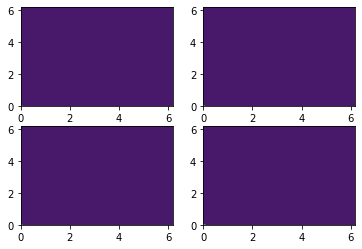

In [289]:
fig, ((ax1, ax2), (ax3, ax4)) = pyplot.subplots(nrows=2, ncols=2)

side_len = 64
xs = numpy.arange(side_len)
X, Y = numpy.meshgrid(xs, xs)
KX, KY = 2*X*pi/float(side_len), 2*Y*pi/float(side_len)

staggered = numpy.ones((side_len, side_len))*1.0
fft_staggered = fft2(staggered)
ax1.contourf(KX, KY, numpy.abs(fft_staggered))

staggered = numpy.ones((side_len, side_len))*1.0j
fft_staggered = fft2(staggered)
ax2.contourf(KX, KY, numpy.abs(fft_staggered))

staggered = -numpy.ones((side_len, side_len))*1.0
fft_staggered = fft2(staggered)
ax3.contourf(KX, KY, numpy.abs(fft_staggered))

staggered = -numpy.ones((side_len, side_len))*1.0j
fft_staggered = fft2(staggered)
ax4.contourf(KX, KY, numpy.abs(fft_staggered))

pyplot.show()

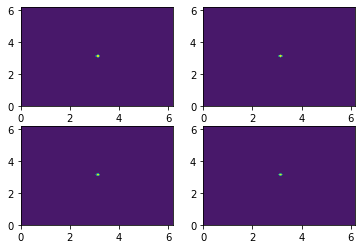

In [290]:
fig, ((ax1, ax2), (ax3, ax4)) = pyplot.subplots(nrows=2, ncols=2)

side_len=64
xs = numpy.arange(side_len)
X, Y = numpy.meshgrid(xs, xs)
KX, KY = 2*X*pi/float(side_len), 2*Y*pi/float(side_len)

columnar = ((X + Y)%2) - ((X + Y + 1)%2)
fft_columnar = fft2(columnar)
ax1.contourf(KX, KY, numpy.abs(fft_columnar))

columnar = ((X + Y)%2)*1.0j - ((X + Y + 1)%2)*1.0j
fft_columnar = fft2(columnar)
ax2.contourf(KX, KY, numpy.abs(fft_columnar))

columnar = -((X + Y)%2) + ((X + Y + 1)%2)
fft_columnar = fft2(columnar)
ax3.contourf(KX, KY, numpy.abs(fft_columnar))

columnar = -((X + Y)%2)*1.0j + ((X + Y + 1)%2)*1.0j
fft_columnar = fft2(columnar)
ax4.contourf(KX, KY, numpy.abs(fft_columnar))

pyplot.show()

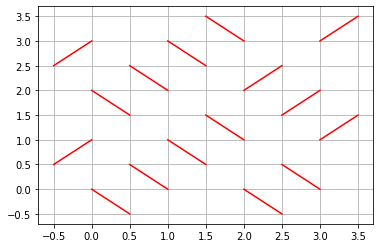

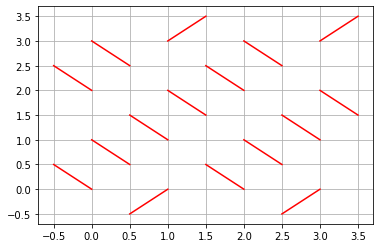

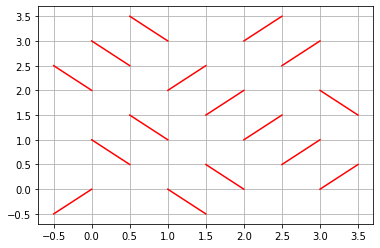

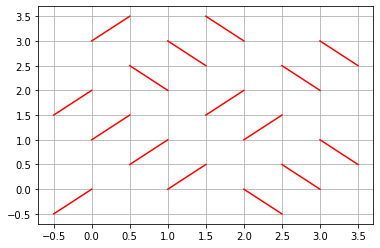

In [291]:
def mock_rand(maxint, size=None):
    assert maxint == 2
    xs = numpy.arange(size[1])
    ys = numpy.arange(size[0])
    X, Y = numpy.meshgrid(xs, ys)
    choices =  (X + Y) % 2
    print(choices)
    return numpy.zeros(size)+1
    return choices

def plaquette(xs, ys, vert=False, rand_fn=numpy.random.randint):
    X, Y = numpy.meshgrid(xs, ys)
    if vert:
        rand_choices = rand_fn(2, size=(len(xs)//2, len(ys)))
        rand_choices = numpy.repeat(rand_choices, 2, axis=0)
        rand_choices_roll = numpy.roll(rand_choices, shift=1, axis=0)
        rand_choices = rand_choices*((X+1)%2) + rand_choices_roll*((X)%2)
        top_bottom = (X+Y+1) % 2
        
        dirs = rand_choices - (1-rand_choices)*1.0j
    else:
        rand_choices = rand_fn(2, size=(len(xs), len(ys)//2))
        rand_choices = numpy.repeat(rand_choices, 2, axis=1)
        rand_choices_roll = numpy.roll(rand_choices, shift=1, axis=1)
        rand_choices = rand_choices*((Y+1)%2) + rand_choices_roll*((Y)%2)
        top_bottom = (X+Y+1) % 2
        
        dirs = rand_choices + (1-rand_choices)*1.0j
    return dirs*top_bottom - dirs*(1-top_bottom)

def draw_plaquette(side_len=4, vert=False, offx=0, offy=0):
    state = plaquette(numpy.arange(side_len)+offx,numpy.arange(side_len)+offy, vert=vert).T
    
    def draw_fn(x, y):
        p = state[x,y]
        if p == 1.0:
            x = 0
        elif p == 1.0j:
            x = 1
        elif p == -1.0:
            x = 2
        elif p == -1.0j:
            x = 3
        v = numpy.zeros((4,))
        v[x] = 1.0
        return v
    draw_for_func(draw_fn, xsidelen=side_len, ysidelen=side_len)

draw_plaquette()
draw_plaquette(vert=True)
draw_plaquette(offy=1)
draw_plaquette(vert=True,offx=1)

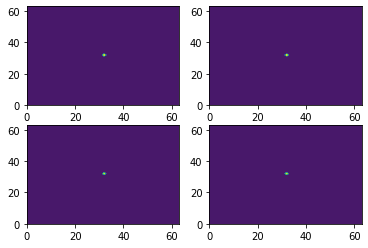

In [292]:
fig, ((ax1, ax2), (ax3, ax4)) = pyplot.subplots(nrows=2, ncols=2)

side_len = 64

state = plaquette(numpy.arange(side_len),numpy.arange(side_len), vert=False).T    
fft_state = fft2(state)
ax1.contourf(numpy.abs(fft_state))

state = plaquette(numpy.arange(side_len),numpy.arange(side_len)+1, vert=False).T    
fft_state = fft2(state)
ax2.contourf(numpy.abs(fft_state))

state = plaquette(numpy.arange(side_len),numpy.arange(side_len), vert=True).T
fft_state = fft2(state)
ax3.contourf(numpy.abs(fft_state))

state = plaquette(numpy.arange(side_len)+1,numpy.arange(side_len), vert=True).T
fft_state = fft2(state)
ax4.contourf(numpy.abs(fft_state))

pyplot.show()

In [307]:
def max_from_abs(data):
    xs = numpy.arange(data.shape[0])
    ys = numpy.arange(data.shape[1])
    X, Y = numpy.meshgrid(xs, ys)
    
    data = data.flatten()
    indx = numpy.argmax(numpy.abs(data))
    
    x = X.flatten()[indx]
    y = Y.flatten()[indx]
    
    return (x,y), data[indx]

side_len = 256

xs = numpy.arange(side_len)
X, Y = numpy.meshgrid(xs, xs)

columnar1 = ((X + Y)%2) - ((X + Y + 1)%2)
columnar2 = ((X + Y)%2)*1.0j - ((X + Y + 1)%2)*1.0j
columnar3 = -((X + Y)%2) + ((X + Y + 1)%2)
columnar4 = -((X + Y)%2)*1.0j + ((X + Y + 1)%2)*1.0j

fft_columnar1 = fft2(columnar1)
fft_columnar2 = fft2(columnar2)
fft_columnar3 = fft2(columnar3)
fft_columnar4 = fft2(columnar4)

print("Columnars:")
columnars = [fft_columnar1,fft_columnar2,fft_columnar3,fft_columnar4]
for d in columnars:
    (x,y), v = max_from_abs(d)
    kx = 2*x/side_len
    ky = 2*y/side_len
    print("({}pi,{}pi)\t{:.3f}\t{:.3f}pi".format(kx, ky, abs(v), numpy.angle(v)/pi))

Columnars:
(1.0pi,1.0pi)	256.000	1.000pi
(1.0pi,1.0pi)	256.000	-0.500pi
(1.0pi,1.0pi)	256.000	0.000pi
(1.0pi,1.0pi)	256.000	0.500pi


In [308]:
plaquette_state1 = plaquette(numpy.arange(side_len),numpy.arange(side_len), vert=False).T    
plaquette_state2 = plaquette(numpy.arange(side_len),numpy.arange(side_len)+1, vert=False).T    
plaquette_state3 = plaquette(numpy.arange(side_len),numpy.arange(side_len), vert=True).T    
plaquette_state4 = plaquette(numpy.arange(side_len)+1,numpy.arange(side_len), vert=True).T    

fft_plaquette1 = fft2(plaquette_state1)
fft_plaquette2 = fft2(plaquette_state2)
fft_plaquette3 = fft2(plaquette_state3)
fft_plaquette4 = fft2(plaquette_state4)

print("Plaquettes:")
plaquettes = [fft_plaquette1,fft_plaquette2,fft_plaquette3,fft_plaquette4]
for d in plaquettes:
    (x,y), v = max_from_abs(d)
    kx = 2*x/side_len
    ky = 2*y/side_len
    print("({}pi,{}pi)\t{:.3f}\t{:.3f}pi".format(kx, ky, abs(v), numpy.angle(v)/pi))


Plaquettes:
(1.0pi,1.0pi)	181.019	0.250pi
(1.0pi,1.0pi)	181.022	-0.748pi
(1.0pi,1.0pi)	181.020	-0.251pi
(1.0pi,1.0pi)	181.021	0.751pi


In [311]:
staggered1 = numpy.ones((side_len, side_len))*1.0
staggered2 = numpy.ones((side_len, side_len))*1.0j
staggered3 = -numpy.ones((side_len, side_len))*1.0
staggered4 = -numpy.ones((side_len, side_len))*1.0j

fft_staggered1 = fft2(staggered1)
fft_staggered2 = fft2(staggered2)
fft_staggered3 = fft2(staggered3)
fft_staggered4 = fft2(staggered4)

print("Staggereds:")
plaquettes = [fft_staggered1,fft_staggered2,fft_staggered3,fft_staggered4]
for d in plaquettes:
    (x,y), v = max_from_abs(d)
    kx = 2*x/side_len
    ky = 2*y/side_len
    print("({}pi,{}pi)\t{:.3f}\t{:.3f}pi".format(kx, ky, abs(v), numpy.angle(v)/pi))

Staggereds:
(0.0pi,0.0pi)	256.000	0.000pi
(0.0pi,0.0pi)	256.000	0.500pi
(0.0pi,0.0pi)	256.000	1.000pi
(0.0pi,0.0pi)	256.000	-0.500pi
